In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Charger le jeu de données
data = pd.read_csv('diabetes.csv', delimiter=',')
df = data.copy()
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Diviser le jeu de données en ensembles d'entraînement et de test
X = df.iloc[:, :-1].values
# X = df[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
# X = df.drop('Outcome', axis=1)
print(X.shape)
y = df.iloc[:, -1].values
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(df[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], df['Outcome'], test_size=0.33,random_state=0)


(768, 8)
(768,)


In [4]:
# Standardiser les caractéristiques en utilisant StandardScaler
X_train_scaled = X_train.copy()
X_train_scaled = StandardScaler().fit_transform(X_train_scaled)

X_test_scaled = X_test.copy()
X_test_scaled = StandardScaler().fit_transform(X_test_scaled)

In [5]:
# Construire le modèle
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(8, ), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Entraîner le modèle
history = model.fit(X_train_scaled, y_train, epochs=500)
history = model.fit(X_train_scaled, y_train, epochs=500, validation_data=(X_test_scaled, y_test))

joblib.dump(model, 'model_first_ml.joblib')

Epoch 1/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4775 - accuracy: 0.7665
Epoch 2/500
17/17 [==============================] - 0s 4ms/step - loss: 0.4774 - accuracy: 0.7665
Epoch 3/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4773 - accuracy: 0.7665
Epoch 4/500
17/17 [==============================] - 0s 6ms/step - loss: 0.4774 - accuracy: 0.7665
Epoch 5/500
17/17 [==============================] - 0s 8ms/step - loss: 0.4774 - accuracy: 0.7665
Epoch 6/500
17/17 [==============================] - 0s 7ms/step - loss: 0.4774 - accuracy: 0.7665
Epoch 7/500
17/17 [==============================] - 0s 6ms/step - loss: 0.4775 - accuracy: 0.7665
Epoch 8/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4774 - accuracy: 0.7665
Epoch 9/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4775 - accuracy: 0.7685
Epoch 10/500
17/17 [==============================] - 0s 6ms/step - loss: 0.4774 - accuracy: 0.7685
Epoch 11/

['model_first_ml.joblib']

In [23]:
model = joblib.load('model_first_ml.joblib')



In [24]:
loss_train, accuracy_train = model.evaluate(X_train_scaled, y_train)
print('Loss: ', loss_train)
print('Accuracy: ', accuracy_train)

17/17 [==============================] - 1s 5ms/step - loss: 0.4774 - accuracy: 0.7704
Loss:  0.4773607850074768
Accuracy:  0.7704280018806458


In [25]:
# Évaluer le modèle
loss_test, accuracy_test = model.evaluate(X_test_scaled, y_test)
print('Loss: ', loss_test)
print('Accuracy: ', accuracy_test)

8/8 [==============================] - 0s 7ms/step - loss: 0.4634 - accuracy: 0.7913
Loss:  0.463403582572937
Accuracy:  0.7913385629653931


KeyError: 'val_loss'

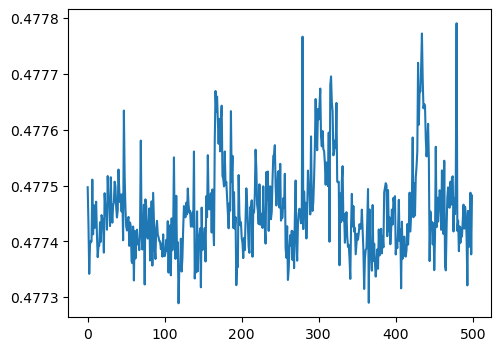

In [31]:
train_results = model.evaluate(X_train_scaled, y_train, verbose=0)
test_results = model.evaluate(X_test_scaled, y_test, verbose=0)

plt.figure(figsize=(12, 4))


# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Faire des prédictions
predictions = model.predict(X_test_scaled)

8/8 [==============================] - 0s 5ms/step


In [11]:
predictions

array([[0.9686396 ],
       [0.17035875],
       [0.08838467],
       [0.6870499 ],
       [0.11777057],
       [0.03531967],
       [0.79156387],
       [0.88919127],
       [0.4053441 ],
       [0.4178946 ],
       [0.6228755 ],
       [0.97288483],
       [0.31424558],
       [0.16896105],
       [0.12968987],
       [0.15922606],
       [0.8917489 ],
       [0.02166235],
       [0.48403823],
       [0.2533255 ],
       [0.70675176],
       [0.4434258 ],
       [0.17214231],
       [0.068196  ],
       [0.04797944],
       [0.35946983],
       [0.04304267],
       [0.9371387 ],
       [0.10736603],
       [0.14217758],
       [0.5140016 ],
       [0.2534242 ],
       [0.10061363],
       [0.47032237],
       [0.09166507],
       [0.74041677],
       [0.5172618 ],
       [0.09038404],
       [0.32422578],
       [0.76676327],
       [0.2867915 ],
       [0.22537947],
       [0.15948658],
       [0.84946823],
       [0.8080538 ],
       [0.00741791],
       [0.08005472],
       [0.207

In [12]:
# Obtenir les poids et les biais du modèle
coef, intercept = model.get_weights()
print(f"Coeficients : {coef}, Intercept : {intercept}")

Coeficients : [[ 0.33014408]
 [ 1.0877949 ]
 [-0.18151592]
 [ 0.07923496]
 [-0.11345755]
 [ 0.69333076]
 [ 0.28365698]
 [ 0.272291  ]], Intercept : [-0.80667156]


In [13]:

# Creating a new data point
new_data_point = pd.DataFrame({
    'Pregnancies': [1],
    'Glucose': [85],
    'BloodPressure': [66],
    'SkinThickness': [29],
    'Insulin': [0],
    'BMI': [26.6],
    'DiabetesPedigreeFunction': [0.351],
    'Age': [31]
})

# Standardizing the new data point using the same scaler
new_data_point_scaled = StandardScaler().fit(X_train).transform(new_data_point)

# Making a prediction
prediction = model.predict(new_data_point_scaled)

prediction = (prediction >= 0.5).astype(int)

# Displaying the prediction
print("Prediction:", "La personne est diabétique" if prediction[0][0] > 0.5 else "La personne n'est pas diabétique")


1/1 [==============================] - 0s 79ms/step
Prediction: La personne n'est pas diabétique
